In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

### Load in Dataset

In [7]:
# Master Dataset
df = pd.read_csv('data/master_df.csv')

# Separate Datasets by Position
qbs = df[df['Position'] == 'QB']
rbs = df[df['Position'] == 'RB']
wrs = df[df['Position'] == 'WR']
tes = df[df['Position'] == 'TE']

# Model Development/Exploration

## Regressions

In [62]:
# Prep Dataset for Regressions with train_test_split
# To define the input and output feature
qb_reduced_df = qbs[['Passing_TD%','Passing_Int%','Passing_1D','Passing_Lng','Passing_Y/A','Passing_AY/A','Passing_Y/C','Passing_Sk','Passing_Sk%','Passing_NY/A','Passing_ANY/A','Rushing_1D','Rushing_Lng','Rushing_Y/A_y','Fantasy_PPR']]
qb_reduced_df = qb_reduced_df.dropna()
x = qb_reduced_df.drop('Fantasy_PPR', axis=1)
y = qb_reduced_df['Fantasy_PPR']

# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)




Coefficients: 
 [ 1.69469662e+01 -2.46879957e+01  1.17473005e+00 -3.81768332e-02
  6.95043163e+01 -7.43501199e+01  8.74158609e-03 -3.60768780e-01
  1.25161073e+00 -2.01109263e+01  2.64410563e+01  2.36621243e+00
  1.29021686e-01  7.09086595e-01]
Mean squared error: 333.14
Coefficient of determination: 0.97


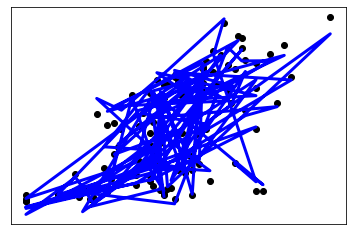

In [65]:
# Ordinary Least Squares using using fit and predict
ols_reg = LinearRegression()
model = ols_reg.fit(x_train,y_train)
y_preds = model.predict(x_test)

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

# Plot outputs
plt.scatter(x_test.iloc[:,0].values, y_test, color="black")
plt.plot(x_test.iloc[:,0].values, y_preds, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [54]:
# Ordinary Least Squares using makepipeline

# Make pipeline
pipe = make_pipeline(StandardScaler(), LinearRegression())
# Fit Model
pipe.fit(x_train,y_train)
# Print Score
print("The R-squared Score was: "+str(pipe.score(x_test,y_test)))
print('')
# Print Importance Coefficients
cdf = pd.DataFrame(pipe.named_steps['linearregression'].coef_, x.columns, columns=['Coefficients'])
print(cdf)

The R-squared Score was: 0.9743738274803329

               Coefficients
Passing_TD%       30.860867
Passing_Int%     -42.120022
Passing_1D        92.627401
Passing_Lng       -0.698704
Passing_Y/A       69.866118
Passing_AY/A    -124.289801
Passing_Y/C        0.011763
Passing_Sk        -5.254802
Passing_Sk%        3.951705
Passing_NY/A     -22.296069
Passing_ANY/A     44.473711
Rushing_1D        26.283069
Rushing_Lng        1.758415
Rushing_Y/A_y      1.843986
